In [12]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [13]:
l = pd.read_pickle('runProva5/stats.pkl')

### Results

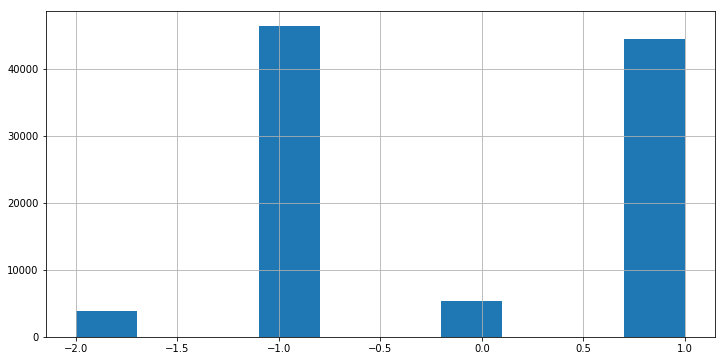

In [14]:
l.result.hist(figsize = (12,6))

In [15]:
victory_summary = l.result.value_counts()
display(victory_summary)
victory_number = victory_summary[1] - victory_summary[-1]
display(victory_number)
display(victory_number / victory_summary.sum())
1 + victory_number / victory_summary.sum()

-1    46399
 1    44420
 0     5334
-2     3847
Name: result, dtype: int64

-1979

-0.01979

0.98021

### Initial card analysis

In [16]:
l['player_initial_card'] = l.player_draw.apply(lambda x: x[0])
l['opponent_initial_card'] = l.opponent_draw.apply(lambda x: x[0])

In [17]:
initial = l.groupby(['player_initial_card', 'opponent_initial_card', 'result']).size().reset_index(name='total')
initial['percentages'] = initial.groupby(['player_initial_card', 'opponent_initial_card']).total.transform(lambda x: x / x.sum())
weighted = initial[initial.result.isin([-1, 0, 1])].copy()
weighted['weights'] = weighted['result'] * weighted['total'] * weighted['percentages']
display(initial.head())
display(weighted.head())

,player_initial_card,opponent_initial_card,result,total,percentages
0,1,1,-2,24,0.030928
1,1,1,-1,375,0.483247
2,1,1,0,62,0.079897
3,1,1,1,315,0.405928
4,1,2,-2,13,0.013458


,player_initial_card,opponent_initial_card,result,total,percentages,weights
1,1,1,-1,375,0.483247,-181.217784
2,1,1,0,62,0.079897,0.000000
3,1,1,1,315,0.405928,127.867268
5,1,2,-1,449,0.464803,-208.696687
6,1,2,0,60,0.062112,0.000000


In [18]:
# For each result I want to take the top percentages
ordered = initial.sort_values(['percentages'], ascending=False).groupby('result').head(10)
ordered.sort_values(['result', 'percentages'], ascending = False)

,player_initial_card,opponent_initial_card,result,total,percentages
150,6,5,1,1016,1.000000
173,7,6,1,796,1.000000
226,mad,6,1,254,1.000000
225,mad,5,1,238,1.000000
172,7,5,1,797,1.000000
224,mad,4,1,244,0.907063
221,mad,3,1,237,0.901141
215,mad,1,1,200,0.858369
171,7,4,1,645,0.809285
218,mad,2,1,194,0.804979


In [10]:
display(weighted.sort_values('weights').head(10))
display(weighted.sort_values('weights').tail(10))

,player_initial_card,opponent_initial_card,result,total,percentages,weights
111,4,fig,-1,2174,0.699936,-1521.660013
137,5,fig,-1,2009,0.644530,-1294.860764
86,3,fig,-1,1876,0.628897,-1179.810929
214,fig,fig,-1,3117,0.366749,-1143.156724
57,2,fig,-1,1684,0.550867,-927.659797
26,1,fig,-1,1459,0.465094,-678.572203
159,6,7,-1,671,0.897059,-601.926471
135,5,7,-1,655,0.815691,-534.277709
132,5,6,-1,729,0.723932,-527.746773
161,6,fig,-1,1252,0.405835,-508.105024


,player_initial_card,opponent_initial_card,result,total,percentages,weights
203,fig,4,1,1335,0.440740,588.387257
195,fig,2,1,1445,0.465979,673.339245
206,fig,5,1,1465,0.482384,706.692460
199,fig,3,1,1455,0.486134,707.325426
180,7,6,1,729,1.000000,729.000000
179,7,5,1,819,1.000000,819.000000
163,6,fig,1,1648,0.534198,880.357861
216,fig,fig,1,2796,0.328980,919.827744
155,6,5,1,1086,1.000000,1086.000000
185,7,fig,1,1735,0.755004,1309.932550


## Backup

In [88]:
initial.sort_values(['percentages'], ascending = False)

,player_initial_card,opponent_initial_card,result,total,percentages
164,7,6,1,521,1.000000
163,7,5,1,551,1.000000
217,mad,6,1,166,1.000000
216,mad,5,1,181,1.000000
141,6,5,1,707,1.000000
212,mad,3,1,168,0.898396
215,mad,4,1,142,0.876543
223,mad,fig,1,465,0.843920
209,mad,2,1,149,0.841808
162,7,4,1,481,0.830743


In [89]:
initial.sort_values(['percentages'], ascending = True)

,player_initial_card,opponent_initial_card,result,total,percentages
182,fig,3,0,23,0.010824
186,fig,4,0,27,0.012414
210,mad,3,-1,3,0.016043
178,fig,2,0,39,0.018293
174,fig,1,0,45,0.020853
26,1,fig,0,56,0.025688
80,3,fig,0,55,0.026178
55,2,fig,0,58,0.027778
207,mad,2,-1,5,0.028249
10,1,3,0,21,0.030043
